In [ ]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
linux_disk1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_disk_1.csv')
linux_disk2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_disk_2.csv')
linux_disk = pd.concat([linux_disk1, linux_disk2])

In [ ]:
linux_disk.drop('ts', axis = 1, inplace=True)
linux_disk.drop('type', axis = 1, inplace= True)

linux_disk.head()

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label
0,3197,148.2,37340,12328,0.22,firefox,0
1,2327,32824.0,688,4,0.04,init,0
2,2797,23468.0,7416,6152,0.04,nautilus,0
3,2801,3612.0,14320,0,0.02,tracer-store,0
4,2993,5184.0,11152,0,0.02,zeitgeist-fts,0


In [ ]:
linux_disk['RDDSK'].isnull().sum()

0

In [ ]:
# To see all the unique values
# unique = linux_disk['RDDSK'].unique()

# for values in unique:
#     print(values, end=', ')

# Replacing 'K'(for e.g 150K as 150000) and 'M'(for e.g 56M to 56000000)

In [ ]:
linux_disk['RDDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['RDDSK'].replace('M', '000000', regex=True, inplace= True)

In [ ]:
unique = linux_disk['RDDSK'].unique()

for values in unique:
    print(values, end=', ')

148.2, 32824.0, 23468.0, 3612.0, 5184.0, 13004.0, 11708.0, 10528.0, 10224.0, 10168.0, 7924.0, 7256.0, 6496.0, 4236.0, 3716.0, 3432.0, 1108.0, 3292.0, 2896.0, 0.0, 2216.0, 1892.0, 1704.0, 1236.0, 1232.0, 876.0, 844.0, 736.0, 724.0, 688.0, 612.0, 604.0, 524.0, 496.0, 404.0, 304.0, 296.0, 292.0, 284.0, 237.0, 212.0, 236.0, 204.0, 184.0, 168.0, 160.0, 144.0, 152.0, 128.0, 72.0, 76.0, 68.0, 64.0, 52.0, 44.0, 36.0, 40.0, 24.0, 20.0, 16.0, 8.0, 4.0, 232.0, 1080.0, 20464.0, 1432.0, 912.0, 2492.0, 364.0, 360.0, 564.0, 120.0, 100.0, 136.0, 96.0, 48.0, 32.0, 196.0, 260.0, 28.0, 20008.0, 1052.0, 840.0, 368.0, 272.0, 60.0, 151.5, 3476.0, 936.0, 808.0, 392.0, 172.0, 12.0, 60836.0, 53228.0, 3844.0, 916.0, 352.0, 316.0, 280.0, 108.0, 88.0, 84.0, 5140.0, 1220.0, 896.0, 708.0, 644.0, 516.0, 488.0, 268.0, 148.0, 112.0, 3840.0, 5900.0, 1524.0, 176.0, 116.0, 80.0, 548.0, 192.0, 92.0, 4504.0, 104.0, 56.0, 1648.0, 1584.0, 1480.0, 492.0, 308.0, 220.0, 140.0, 124.0, 50724.0, 29652.0, 2712.0, 2396.0, 1972.0, 14

In [ ]:
linux_disk['RDDSK'] = linux_disk['RDDSK'].astype(float)

In [ ]:
linux_disk['RDDSK'].isnull().sum()

0

In [ ]:
#Also has 'K's as 'M's

# unique = linux_disk['WRDSK'].unique()

# for values in unique:
#     print(values, end=', ')

In [ ]:
#Getting rid of the 'K's and 'M's
linux_disk['WRDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['WRDSK'].replace('M', '000000', regex=True, inplace= True)

In [ ]:
# Dealing with very small errors in the dataset
linux_disk.loc[linux_disk['WRDSK']== '49.9 1', 'WRDSK'] = '49.91'
linux_disk.loc[linux_disk['WRDSK']== '-', 'WRDSK'] = '-1'


In [ ]:
linux_disk['WRDSK'] = linux_disk['WRDSK'].astype(float)

In [ ]:
#Also has 'K's as 'M's

unique = linux_disk['WCANCL'].unique()

for values in unique:
    print(values, end=', ')

12328, 4, 6152, 0, 20, 420, 36, 16, 4256, 5364, 5244, 5788, 768, 904, 3332, 4752, 4840, 5284, 56, 6616, 32, 6772, 127.9, 72676.0, 2912.0, 912.0, 180.0, 73768.0, 12.0, 8.0, 3600, 9024, 52, 7068, 3772, 40, 28, 2200.0, 1964.0, 2.5, 3932.0, 0, 4, 8, 16, 6940, 24, 28, 36, 7020, 12, 48, 60, 500, 40, 32, 6828, 1584, 5892K, 17784K, 16K, 36K, 4K, 24K, 3928K, 60K, 56K, 17784, 5892, 15808, 56, 5892, 15808, 1976, 3928, 60, 72, 17784, 4436, 2472, 2636, 5280, 1584, 2384, 276, 264, 132, 1444, 2540, 48168, 708, 644, 680, 1292, 1328, 4716, 4568, 4604, 4980, 4952, 4700, 4620, 1084, 4676, 5292, 4968, 5004, 4848, 144, 640, 896, 3712, 3456, 5780, 404, 18512, 26872, 2888, 80412, 548, 53540, 2976, 420, 1%, 5%, 2%, 6%, 3%, 4%, 2496, 3528, 1260, 3244, 1332, 2952, 3120, 2736, 47516, 45112, 2868, 4780, 5372, 4536, 5156, 5436, 824, 100, 13108, 13152, 672, 512, 1664, 26808, 2944, 5516, 4932, 

In [ ]:
#Getting rid of the 'K's and 'M's
linux_disk['WCANCL'].replace('K', '000', regex=True, inplace= True)
linux_disk['WCANCL'].replace('M', '000000', regex=True, inplace= True)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_disk['CMD'] = le.fit_transform(linux_disk['CMD'])

linux_disk['WCANCL'].replace('1%', '0.01', regex=True, inplace= True)
linux_disk['WCANCL'].replace('5%', '0.05', regex=True, inplace= True)
linux_disk['WCANCL'].replace('2%', '0.02', regex=True, inplace= True)
linux_disk['WCANCL'].replace('6%', '0.06', regex=True, inplace= True)
linux_disk['WCANCL'].replace('3%', '0.03', regex=True, inplace= True)
linux_disk['WCANCL'].replace('4%', '0.04', regex=True, inplace= True)
linux_disk['WCANCL'] = linux_disk['WCANCL'].astype(float)


linux_disk['DSK'].replace( ['worer/u256:0', 'atop', 'dhclient', 'apache2','<apache2>', '<dhclient>' ] ,[ '0','0', '0','0', '0','0' ], inplace= True)
linux_disk['DSK'].replace('%', '', regex=True, inplace=True)
linux_disk['DSK'] = linux_disk['DSK'].astype(float)
linux_disk['DSK'].replace([8.0, 5.0, 4.0, 2.0, 26.0, 12.0, 6.0, 29.0, 19.0, 52.0, 11.0, 3.0, 87.0, 66.0, 79.0, 9.0, 13.0, 82.0, 91.0, 93.0, 62.0, 7.0, 88.0, 48.0, 81.0, 84.0, 94.0, 90.0, 92.0, 86.0, 95.0, 96.0, 75.0, 16.0, 54.0, 18.0, 17.0, 25.0, 47.0, 20.0, 60.0, 74.0, 10.0, 24.0, 37.0, 33.0, 23.0, 44.0, 15.0, 43.0, 28.0, 61.0, 59.0, 89.0, 40.0, 21.0, 22.0, 69.0, 97.0, 70.0, 63.0, 83.0, 58.0, 41.0, 45.0, 27.0, 14.0, 78.0, 77.0, 71.0, 39.0, 56.0, 32.0, 98.0, 76.0, 42.0, 57.0, 80.0, 51.0, 73.0, 30.0, 31.0, 50.0, 68.0, 38.0, 46.0, 53.0, 49.0, 72.0, 35.0, 34.0, 36.0, 55.0, 99.0, 67.0, 65.0, 100.0, 85.0, 64.0], [0.08, 0.05, 0.04, 0.02,0.26, 0.12, 0.06, 0.29, 0.19, 0.52, 0.11, 0.03, 0.87, 0.66, 0.79, 0.09, 0.13, 0.82, 0.91, 0.93, 0.62, 0.07, 0.88, 0.48, 0.81, 0.84, 0.94, 0.90, 0.92, 0.86, 0.95, 0.96, 0.75, 0.16, 0.54, 0.18, 0.17, 0.25, 0.47, 0.20, 0.60, 0.74, 0.10, 0.24, 0.37, 0.33, 0.23, 0.44, 0.15, 0.43, 0.28, 0.61, 0.59, 0.89, 0.40, 0.21, 0.22, 0.69, 0.97, 0.70, 0.63, 0.83, 0.58, 0.41, 0.45, 0.27, 0.14, 0.78, 0.77, 0.71, 0.39, 0.56, 0.32, 0.98, 0.76, 0.42, 0.57, 0.80, 0.51, 0.73, 0.30, 0.31, 0.50, 0.68, 0.38, 0.46, 0.53, 0.49, 0.72, 0.35, 0.34, 0.36, 0.55, 0.99, 0.67, 0.65, 1.00, 0.85, 0.64], regex=True, inplace=True)

In [ ]:
# #Also has 'K's as 'M's

unique = linux_disk['DSK'].unique()

for values in unique:
    print(values, end=', ')

0.22, 0.04, 0.02, 0.01, 0.0, 0.32, 0.1, 0.08, 0.07, 0.06, 0.26, 0.6, 0.12, 0.7, 0.16, 0.05, 0.9, 0.03, 0.42, 0.09, 0.5, 0.88, 0.71, 0.67, 0.31, 0.29, 0.92, 0.56, 0.37, 0.89, 0.86, 0.93, 0.84, 0.96, 0.66, 0.24, 0.8, 0.74, 0.82, 0.17, 0.95, 0.25, 0.19, 0.23, 0.13, 0.11, 0.21, 0.15, 0.3, 0.14, 0.2, 0.18, 0.54, 0.41, 0.27, 0.28, 0.33, 0.36, 0.77, 0.34, 0.46, 0.45, 0.68, 0.43, 0.49, 0.53, 0.69, 0.52, 0.98, 0.57, 0.38, 0.91, 0.47, 0.85, 0.64, 0.63, 0.65, 0.35, 1.0, 0.39, 0.4, 0.83, 0.55, 0.75, 0.97, 0.76, 0.59, 0.48, 0.73, 0.79, 0.99, 0.81, 0.72, 0.94, 0.87, 0.78, 0.51, 0.61, 0.44, 0.62, 0.58, 

In [ ]:
#Also has 'K's as 'M's

unique = linux_disk['DSK'].unique()

for values in unique:
    print(values, end=', ')

0.22, 0.04, 0.02, 0.01, 0.0, 0.32, 0.1, 0.08, 0.07, 0.06, 0.26, 0.6, 0.12, 0.7, 0.16, 0.05, 0.9, 0.03, 0.42, 0.09, 0.5, 0.88, 0.71, 0.67, 0.31, 0.29, 0.92, 0.56, 0.37, 0.89, 0.86, 0.93, 0.84, 0.96, 0.66, 0.24, 0.8, 0.74, 0.82, 0.17, 0.95, 0.25, 0.19, 0.23, 0.13, 0.11, 0.21, 0.15, 0.3, 0.14, 0.2, 0.18, 0.54, 0.41, 0.27, 0.28, 0.33, 0.36, 0.77, 0.34, 0.46, 0.45, 0.68, 0.43, 0.49, 0.53, 0.69, 0.52, 0.98, 0.57, 0.38, 0.91, 0.47, 0.85, 0.64, 0.63, 0.65, 0.35, 1.0, 0.39, 0.4, 0.83, 0.55, 0.75, 0.97, 0.76, 0.59, 0.48, 0.73, 0.79, 0.99, 0.81, 0.72, 0.94, 0.87, 0.78, 0.51, 0.61, 0.44, 0.62, 0.58, 

In [ ]:
#To see all the unique values
# unique = linux_disk['CMD'].unique()

# for values in unique:
#     print(values, end=', ')

In [ ]:
import matplotlib.pyplot as plt
columns = linux_disk.columns
for col in columns:
    print("col: ", col)
    linux_disk[col].hist(bins = 50)
    plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [ ]:
x = linux_disk.drop('label', axis = 1)
y = linux_disk['label']

# Without Oversampling

In [ ]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
DtreeAccuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of Decisiontree  : ",DtreeAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
Dtreef1_scr = f1_score(y_test, y_pred_dtc)
print("f1_score of Decisiontree  : ",Dtreef1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_dtc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 0 0]
Accuracy of Decisiontree  :  86.49302673086503 %
f1_score of Decisiontree  :  50.3713645167686 %
AUC: 0.69


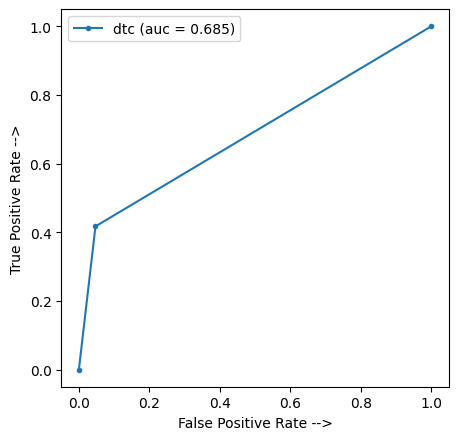

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1409384, 1: 277057}
After oversampling {0: 1409384, 1: 1409384}


In [ ]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
dtcAccuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of DicisionTree : ",dtcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
dtcf1_scr = f1_score(y_test, y_pred_dtc)
print("f1_score of DicisionTree : ",dtcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_dtc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 1 1]
Accuracy of DicisionTree :  79.7897521186561 %
f1_score of DicisionTree :  80.11004971789285 %
AUC: 0.80


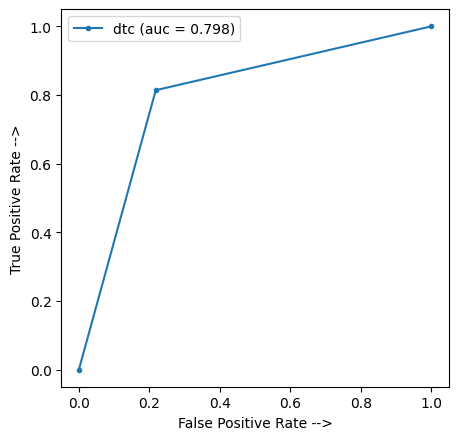

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
confusion_matrix(y_test,y_pred_dtc)

array([[137731,  38442],
       [ 32768, 143405]])

# Undersampling

In [ ]:
x = linux_disk.drop(['label'],axis=1)
y = linux_disk['label']

In [ ]:
for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))


Before undersampling Counter({0: 1409384, 1: 277057})
After undersampling Counter({0: 277057, 1: 277057})


^for some reason the undersampling is not complete

In [ ]:
for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionAccuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of DicisionTree : ",LogisticRegressionAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionf1_scr = f1_score(y_test, y_pred_dtc)
print("f1_score of DicisionTree : ",LogisticRegressionf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_dtc)
print('AUC: %.2f' % auc)




[0 0 1 ... 1 0 0]
Accuracy of DicisionTree :  85.24341649341649 %
f1_score of DicisionTree :  64.30342611671847 %
AUC: 0.76


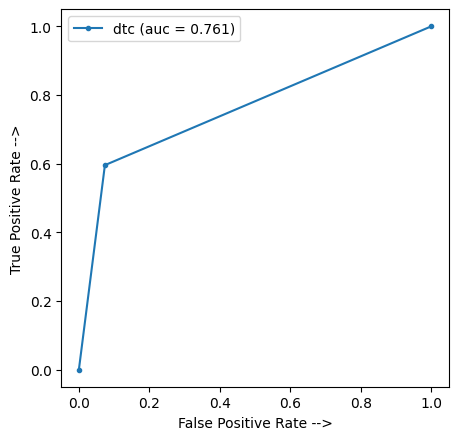

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()